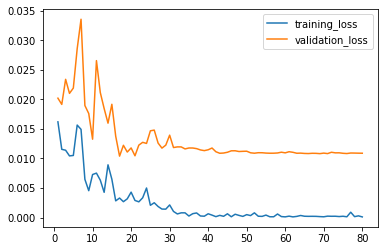

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


losses = pd.read_feather("../output/crop_from_gt/resnet.feather").set_index("index")

plt.plot(losses.index, losses["train_loss"], label="training_loss")
plt.plot(losses.index, losses["validation_loss"], label="validation_loss")
plt.legend()
plt.show()

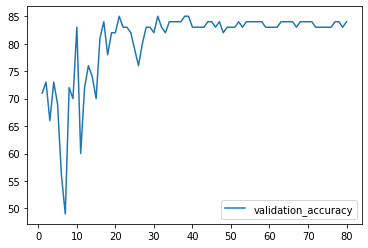

In [2]:
plt.figure()
plt.plot(losses.index, losses["validation_accuracy"], label="validation_accuracy")
plt.legend()
plt.show()

In [3]:
import numpy as np
import pandas as pd 

models = ["resnet", "alexnet", "vgg", "squeezenet", "densenet", "efficientnet"]
validation_losses = []
validation_accuracies = []
epoch_best_loss = []
epoch_best_accuracy = []
for model in models:
    losses = pd.read_feather(f"../output/crop_from_gt/{model}.feather").set_index("index")

    validation_losses.append(losses.loc[losses.index % 2 == 1, "validation_loss"].min())
    epoch_best_loss.append(losses.loc[losses.index % 2 == 1, "validation_loss"].idxmin())

    validation_accuracies.append(losses.loc[losses.index % 2 == 1, "validation_accuracy"].max())
    epoch_best_accuracy.append(losses.loc[losses.index % 2 == 1, "validation_accuracy"].idxmax())

    
rankings = pd.DataFrame(None, index=models, columns=["Rank best loss", "Rank best accuracy", "Epoch best accuracy", "Epoch best loss"])
rankings.loc[models, "Epoch best loss"] = pd.Series(epoch_best_loss, index=models)
rankings.loc[models, "Epoch best accuracy"] = pd.Series(epoch_best_accuracy, index=models)
rankings.loc[models, "Rank best loss"] = pd.DataFrame(np.array([models, validation_losses]).T, columns=["model", "accuracy"]).sort_values(by="accuracy", ascending=True).reset_index(drop=True).reset_index().set_index("model")["index"] + 1
rankings.loc[models, "Rank best accuracy"] = pd.DataFrame(np.array([models, validation_accuracies]).T, columns=["model", "accuracy"]).sort_values(by="accuracy", ascending=False).reset_index(drop=True).reset_index().set_index("model")["index"] + 1
rankings

,Rank best loss,Rank best accuracy,Epoch best accuracy,Epoch best loss
resnet,1,4,21,17
alexnet,4,5,27,27
vgg,2,1,37,37
squeezenet,6,6,7,35
densenet,3,3,21,33
efficientnet,5,2,43,19
